# 📊 Customer Churn Prediction Project

## 1. 📌 Project Objective
Predict which customers are likely to churn (leave the service) based on historical data.

---

## 2. 📂 Dataset Overview
- Number of records: ...
- Number of features: ...
- Target variable: `Churn` (0 = Stayed, 1 = Churned)

---

## 3. 🧼 Data Cleaning & Preprocessing
- Removed missing values in `TotalCharges`
- Converted categorical variables to numeric
- Label encoded target variable

---

## 4. 🔍 Exploratory Data Analysis (EDA)

### 4.1 Churn Distribution
(Insert value counts / pie chart)

### 4.2 Monthly Charges vs Churn
(Insert boxplot)

### 4.3 Contract Type vs Churn Rate
(Insert crosstab)

---

## 5. 🤖 Model Building

- Used: `RandomForestClassifier`
- Train/test split: 80/20
- Accuracy: 79.1%
- Model performance:
  - Precision, Recall, F1
  - Confusion Matrix

---

## 6. 🔬 Feature Importance
(Insert bar chart of top 10 important features)

---

## 7. ✅ Conclusion & Recommendations

- Short-term customers with month-to-month contracts are more likely to churn.
- High monthly charges also correlated with churn.
- Business suggestion: Incentivize long-term contracts (1–2 years).


## Import the  libraries

In [3]:
# Import the pandas library, commonly used for data manipulation and analysis
import pandas as pd

# Read the CSV file "telco.csv" into a DataFrame
# The file path "/content/telco.csv" suggests this is being run in a Google Colab environment
df = pd.read_csv("/content/telco.csv")

# Print the shape of the DataFrame — this shows the number of rows and columns
print(df.shape)

# Print the data types of each column — helps understand whether columns are numeric, object (string), etc.
print(df.dtypes)


(7043, 22)
Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [4]:
# Check for missing (null) values in each column and count them
df.isnull().sum()


,0
Unnamed: 0,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [5]:
# Display the first 5 rows of the DataFrame df
df.head()


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


In [6]:
# Drop all rows with any missing (NaN) values from the DataFrame df
# The changes are made directly to df (no new object is returned) because inplace=True
df.dropna(inplace=True)


In [7]:
df.dtypes

,0
Unnamed: 0,int64
customerID,object
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [8]:
# Print the data type of the 'TotalCharges' column
print(df['TotalCharges'].dtype)


object


In [9]:
# Convert the 'TotalCharges' column to numeric (float or int)
# Any non-numeric values (e.g., empty strings, text) will be replaced with NaN (missing values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [10]:
# Print the relative frequency (proportion) of each unique value in the 'Churn' column
# normalize=True gives the result as percentages (proportions), not just counts
print(df["Churn"].value_counts(normalize=True))


Churn
Stayed     0.73463
Churned    0.26537
Name: proportion, dtype: float64


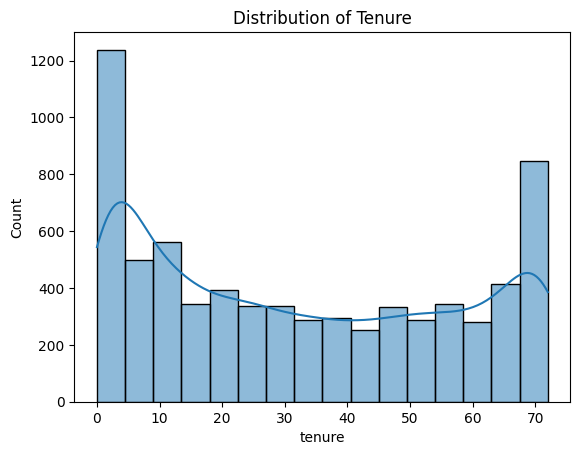

In [11]:
# Import seaborn for advanced visualization and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the 'tenure' column to show how long customers have stayed
# kde=True adds a smooth curve to estimate the distribution (Kernel Density Estimation)
sns.histplot(df['tenure'], kde=True)

# Add a title to the plot
plt.title("Distribution of Tenure")

# Display the plot
plt.show()


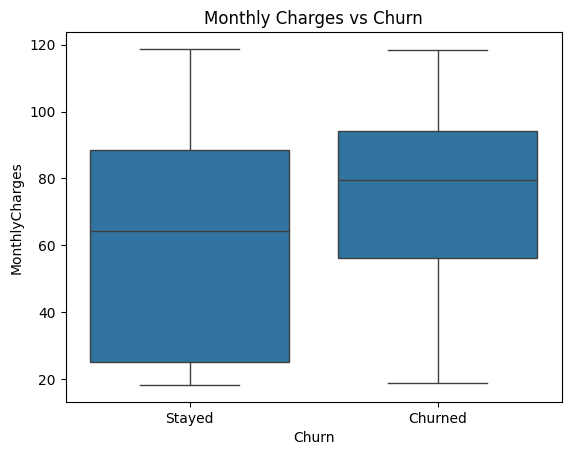

In [12]:
# Create a boxplot to compare the distribution of MonthlyCharges between Churned and Non-Churned customers
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

# Add a title to the plot
plt.title("Monthly Charges vs Churn")

# Show the plot
plt.show()


In [13]:
# Create a cross-tabulation (contingency table) between 'InternetService' and 'Churn' columns
# normalize='index' means percentages are calculated **row-wise** (for each InternetService type)
# Multiplying by 100 converts proportions to percentages
pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100


Churn,Churned,Stayed
InternetService,,
DSL,18.862401,81.137599
Fiber optic,41.892765,58.107235
No,7.404980,92.595020
dsl,26.666667,73.333333


In [14]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Stayed
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


In [15]:
# Generate descriptive statistics summary of numeric columns in df
df.describe()


,Unnamed: 0,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,3521.000000,32.371149,64.761692,2283.300441
std,2033.283305,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,1760.500000,9.000000,35.500000,401.450000
50%,3521.000000,29.000000,70.350000,1397.475000
75%,5281.500000,55.000000,89.850000,3794.737500
max,7042.000000,72.000000,118.750000,8684.800000


In [16]:
# Display a concise summary of the DataFrame df
# Shows number of entries, column names, non-null counts, and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [17]:
# 1. Check and fix numeric columns (TotalCharges)

# Print the data type of the 'TotalCharges' column before conversion
print("Data type of TotalCharges before conversion:", df['TotalCharges'].dtype)

# Convert 'TotalCharges' column to numeric (float)
# Invalid parsing will be set as NaN because of errors='coerce'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Print the data type of 'TotalCharges' after conversion
print("Data type of TotalCharges after conversion:", df['TotalCharges'].dtype)

# Check and print the number of missing values (NaN) after conversion
print("Number of missing values in TotalCharges:", df['TotalCharges'].isnull().sum())


Data type of TotalCharges before conversion: float64
Data type of TotalCharges after conversion: float64
Number of missing values in TotalCharges: 11


In [18]:
# Drop all rows where the 'TotalCharges' column has missing values (NaN)
# This modifies the DataFrame df by removing incomplete rows in 'TotalCharges'
df = df.dropna(subset=["TotalCharges"])


In [19]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Stayed
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


In [20]:
# Calculate the percentage distribution of unique values in the 'Churn' column
# normalize=True returns proportions, multiplying by 100 converts to percentages
df["Churn"].value_counts(normalize=True) * 100


,proportion
Churn,
Stayed,73.421502
Churned,26.578498


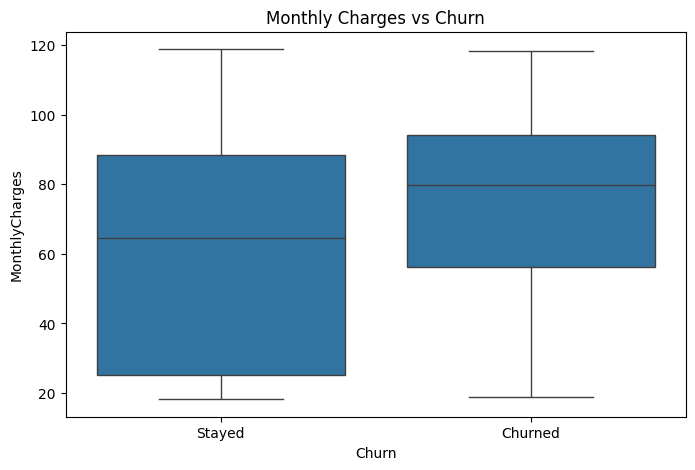

In [21]:
# Set the figure size for better readability
plt.figure(figsize=(8,5))

# Create a boxplot to compare MonthlyCharges distribution across Churn categories ('Yes'/'No')
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)

# Add a title to the plot
plt.title("Monthly Charges vs Churn")

# Display the plot
plt.show()


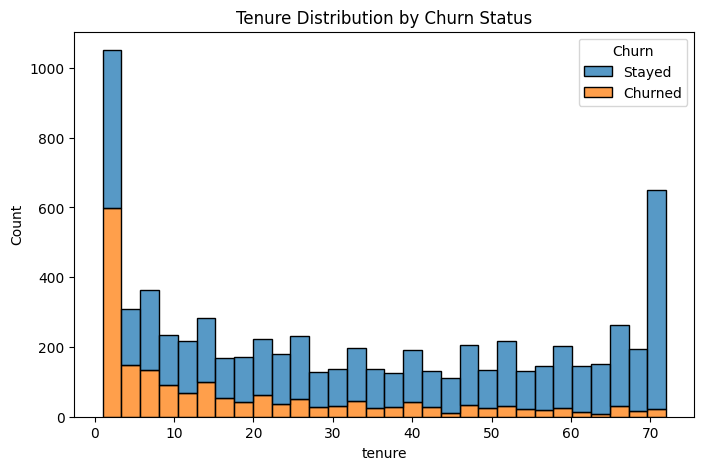

In [22]:
# Set figure size for better visibility
plt.figure(figsize=(8,5))

# Plot a stacked histogram of 'tenure' separated by 'Churn' status
# 'hue="Churn"' colors the bars by churn categories (Yes/No)
# 'multiple="stack"' stacks the counts for each churn category on top of each other
# 'bins=30' divides tenure into 30 intervals for finer granularity
sns.histplot(data=df, x="tenure", hue="Churn", multiple='stack', bins=30)

# Add a descriptive title
plt.title("Tenure Distribution by Churn Status")

# Show the plot
plt.show()


In [23]:
# Create a cross-tabulation of 'Contract' types against 'Churn' status
# normalize='index' calculates percentages row-wise (within each Contract type)
# Multiplying by 100 converts proportions to percentages
pd.crosstab(df["Contract"], df["Churn"], normalize="index") * 100


Churn,Churned,Stayed
Contract,,
Month-to-month,42.709677,57.290323
One year,11.277174,88.722826
Two year,2.848665,97.151335


In [24]:
# Import LabelEncoder for converting categorical target to numeric
from sklearn.preprocessing import LabelEncoder

# Convert target variable "Churn" from categorical to numeric:
# 'Yes' -> 1 (churned), 'No' -> 0 (stayed)
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Churned=1, Stayed=0

# List of categorical columns to encode (exclude identifiers and target)
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Apply one-hot encoding to these categorical columns:
# This converts each category into separate binary columns (0/1),
# drop_first=True avoids dummy variable trap by dropping the first category per column
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Print the shape of the new DataFrame and its columns list
print("New dataframe shape:", df_encoded.shape)
print("\n", df_encoded.columns)


New dataframe shape: (7032, 34)

 Index(['Unnamed: 0', 'customerID', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'InternetService_dsl',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [25]:
df_encoded.head()

,Unnamed: 0,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,7590-VHVEG,1,29.85,29.85,1,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,1,5575-GNVDE,34,56.95,1889.50,1,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2,3668-QPYBK,2,53.85,108.15,0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,3,7795-CFOCW,45,42.30,1840.75,1,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,4,9237-HQITU,2,70.70,151.65,0,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [26]:
# Import necessary libraries for data splitting, modeling, and evaluation

from sklearn.model_selection import train_test_split  # To split dataset into train/test sets
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier algorithm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics

# 1. Prepare the features and target variables

# Features (X): drop 'customerID' since it's just an identifier and 'Churn' which is the target
X = df_encoded.drop(['customerID', 'Churn'], axis=1)

# Target (y): the 'Churn' column which indicates if customer churned (1) or stayed (0)
y = df_encoded['Churn']

# 2. Split data into training and testing sets

# train_test_split divides data into:
# - training set (80%): used to fit/train the model
# - testing set (20%): used to evaluate the model on unseen data
# random_state ensures the split is reproducible (same every time)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=110
)

# 3. Initialize and train the Random Forest Classifier

# Random Forest is an ensemble of decision trees which improves accuracy and controls overfitting
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# 4. Predict on the test data

# Generate predicted labels for the test set
y_pred = model.predict(X_test)

# 5. Evaluate model performance

# Calculate accuracy: proportion of correct predictions over total predictions
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate classification report showing precision, recall, f1-score, and support per class
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix to visualize TP, TN, FP, and FN counts
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7896233120113717

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.49      0.56       381
           1       0.83      0.90      0.86      1026

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[186 195]
 [101 925]]


In [27]:
# Count the number of occurrences for each class in the target variable y (Churn)
y.value_counts()


,count
Churn,
1,5163
0,1869


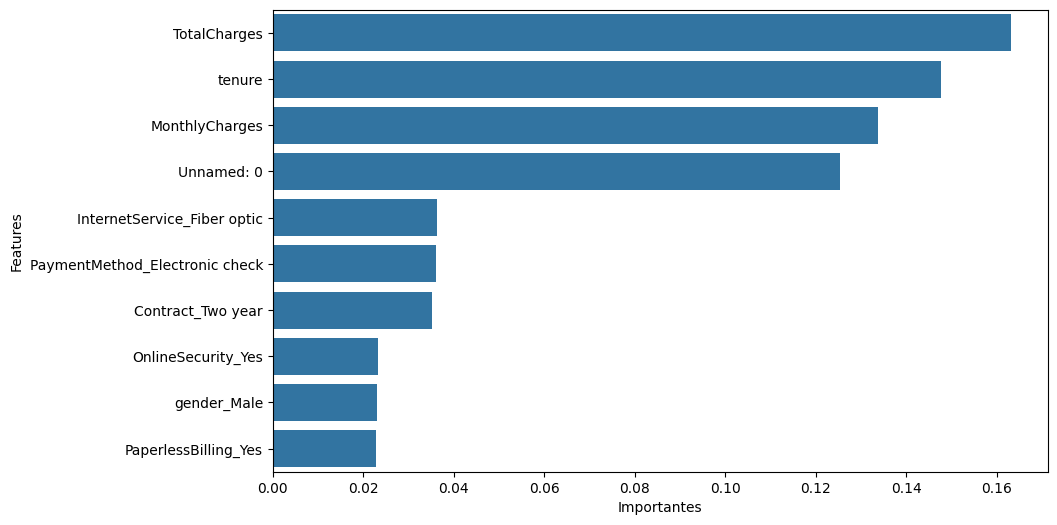

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is imported for the barplot

# Get feature importances from the trained Random Forest model
importances = model.feature_importances_

# Get the feature names from the DataFrame X
features = X.columns

# Create a DataFrame combining feature names and their importance scores
feat_df = pd.DataFrame({
    'Features': features,
    'Importantes': importances  # Note: you might want to rename 'Importantes' to 'Importances' for consistency
})

# Sort the features by importance in descending order and keep top 10
feat_df = feat_df.sort_values(by="Importantes", ascending=False).head(10)

# Set figure size for better readability
plt.figure(figsize=(10,6))

# Plot a horizontal barplot of the top 10 important features
sns.barplot(data=feat_df, x='Importantes', y='Features')

# Show the plot
plt.show()


In [30]:
# Print count of each class in target variable y (number of customers who stayed vs churned)
print(y.value_counts())

# Print percentage distribution of each class in y
print(y.value_counts(normalize=True) * 100)


Churn
1    5163
0    1869
Name: count, dtype: int64
Churn
1    73.421502
0    26.578498
Name: proportion, dtype: float64


In [31]:
# Import SMOTE from imblearn to handle class imbalance by oversampling the minority class
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a fixed random state for reproducibility
sm = SMOTE(random_state=110)

# Apply SMOTE to features (X) and target (y)
# This creates synthetic samples of the minority class to balance the dataset
X_resampled, y_resampled = sm.fit_resample(X, y)

# Print the new class distribution after applying SMOTE
print(y_resampled.value_counts())


Churn
1    5163
0    5163
Name: count, dtype: int64


In [32]:
# Create a Random Forest classifier with specific parameters:
# - n_estimators=100: build 100 trees in the forest
# - class_weight='balanced': automatically adjust weights inversely proportional to class frequencies to handle imbalance
# - random_state=110: fixed seed for reproducibility
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=110)

# Train the Random Forest model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=110)

In [33]:
# Split the resampled (balanced) dataset into training and testing sets
# - 80% training data, 20% testing data
# - random_state=110 ensures reproducibility of the split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=110
)


In [34]:
# Initialize a Random Forest classifier with 100 trees and fixed random state for reproducibility
model_resampled = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the balanced training dataset obtained after SMOTE resampling
model_resampled.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

In [35]:
# Use the trained Random Forest model on balanced data to predict churn labels on the test set
y_pred_res = model_resampled.predict(X_test_res)


In [36]:
# Print accuracy score to see overall correctness after training on SMOTE-balanced data
print("Accuracy after SMOTE:", accuracy_score(y_test_res, y_pred_res))

# Print classification report for detailed metrics:
# precision, recall, f1-score, and support per class (0 = stayed, 1 = churned)
print("Classification Report after SMOTE:\n", classification_report(y_test_res, y_pred_res))

# Print confusion matrix to see counts of true positives, false positives, true negatives, and false negatives
print("Confusion Matrix after SMOTE:\n", confusion_matrix(y_test_res, y_pred_res))


Accuracy after SMOTE: 0.8446272991287512
Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1036
           1       0.83      0.86      0.85      1030

    accuracy                           0.84      2066
   macro avg       0.85      0.84      0.84      2066
weighted avg       0.85      0.84      0.84      2066

Confusion Matrix after SMOTE:
 [[857 179]
 [142 888]]


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1. Define the base Random Forest model (with fixed random state for reproducibility)
rf = RandomForestClassifier(random_state=110)

# 2. Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20],          # Maximum depth of each tree
    'max_features': ['auto', 'sqrt'],     # Number of features to consider at each split
    'min_samples_split': [2, 5],          # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],           # Minimum samples required at a leaf node
    'class_weight': ['balanced']          # Use balanced class weights to handle class imbalance
}

# 3. Setup GridSearchCV to search for the best combination of hyperparameters
# - cv=3 means 3-fold cross-validation
# - n_jobs=-1 uses all available CPU cores to speed up computation
# - verbose=2 prints detailed progress information
# - scoring='f1' optimizes for F1-score, balancing precision and recall
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1'
)

# 4. Fit the GridSearch on the balanced training dataset created by SMOTE
grid_search.fit(X_train_res, y_train_res)

# 5. Print the best hyperparameters found and the corresponding best F1 score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.852186852484467


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the final Random Forest model with best parameters from GridSearchCV
final_model = RandomForestClassifier(
    n_estimators=200,          # Number of trees in the forest
    max_depth=20,              # Maximum depth of each tree to control overfitting
    max_features='sqrt',       # Number of features to consider when looking for the best split
    min_samples_leaf=1,        # Minimum samples required at a leaf node
    min_samples_split=2,       # Minimum samples required to split an internal node
    class_weight='balanced',   # Adjust weights inversely proportional to class frequencies
    random_state=42            # Fixed random seed for reproducibility
)

# Train the final model on the balanced training data created by SMOTE
final_model.fit(X_train_res, y_train_res)

# Predict churn on the balanced test set
y_pred_final = final_model.predict(X_test_res)

# Evaluate the final model's performance

# Accuracy: overall fraction of correct predictions
print("Final Model Accuracy:", accuracy_score(y_test_res, y_pred_final))

# Classification report: precision, recall, f1-score, and support per class
print("Final Classification Report:\n", classification_report(y_test_res, y_pred_final))

# Confusion matrix: counts of true positives, true negatives, false positives, and false negatives
print("Final Confusion Matrix:\n", confusion_matrix(y_test_res, y_pred_final))


Final Model Accuracy: 0.8518877057115198
Final Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1036
           1       0.84      0.87      0.85      1030

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Final Confusion Matrix:
 [[868 168]
 [138 892]]


# 📊 Customer Churn Prediction - Final Report

## 1. Project Objective
Explain the business goal and why predicting churn is important.

## 2. Data Overview
Show basic info about dataset and describe features.

## 3. Data Cleaning & Preprocessing
Explain how missing values handled, encoding, balancing.

## 4. Exploratory Data Analysis (EDA)
Include plots for churn distribution, contract type vs churn, monthly charges, etc.

## 5. Model Building
Describe model choice (RandomForest), training, and tuning.

## 6. Model Evaluation
Show accuracy, classification report, confusion matrix.

## 7. Feature Importance
Plot top important features.

## 8. Conclusion & Recommendations
Summarize findings and suggest business actions.


In [40]:
print("""
Project Objective:
We aim to predict customer churn in a telecommunications company
to help reduce revenue loss and improve customer retention.
""")



Project Objective:
We aim to predict customer churn in a telecommunications company
to help reduce revenue loss and improve customer retention.



In [41]:
# Print the shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# Print a concise summary of the DataFrame including:
# - number of non-null entries per column
# - data types of each column
print(df.info())

# Print descriptive statistics for numerical columns including:
# count, mean, std, min, max, and quartiles
print(df.describe())

# Print a header for churn class count
print("\nCount churn classes\n")

# Count the number of occurrences of each class in 'Churn' column
print(df['Churn'].value_counts())


Dataset shape: (7032, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          703

In [42]:
# Drop rows where 'TotalCharges' has missing values to avoid errors during numeric operations
df = df.dropna(subset=['TotalCharges'])

# Import LabelEncoder to convert categorical target variable into numeric
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Churn' column: 'No' -> 0 (Stayed), 'Yes' -> 1 (Churned)
df['Churn'] = le.fit_transform(df['Churn'])

# Define features (X) and target (y)
# Drop 'customerID' and 'Unnamed: 0' because they are identifiers and not useful for prediction
# Also drop 'Churn' from features because it's the target
X = df.drop(['customerID', 'Churn', 'Unnamed: 0'], axis=1)

# Target variable for prediction
y = df['Churn']

# Convert categorical feature columns into dummy/indicator variables using one-hot encoding
# drop_first=True avoids dummy variable trap by dropping first category of each feature
X = pd.get_dummies(X, drop_first=True)

# Print shape of the feature set after encoding to verify dimensions
print("Features after encoding:", X.shape)


Features after encoding: (7032, 31)


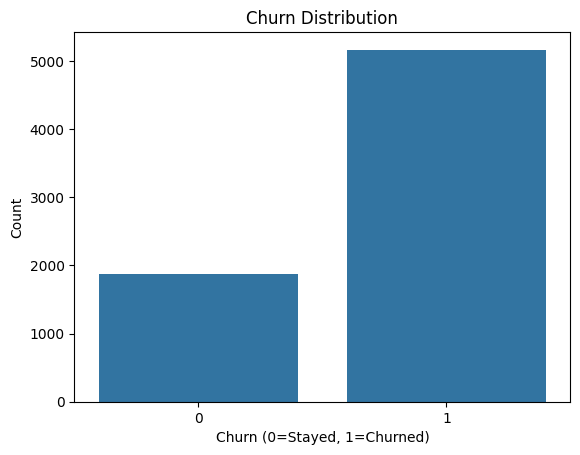

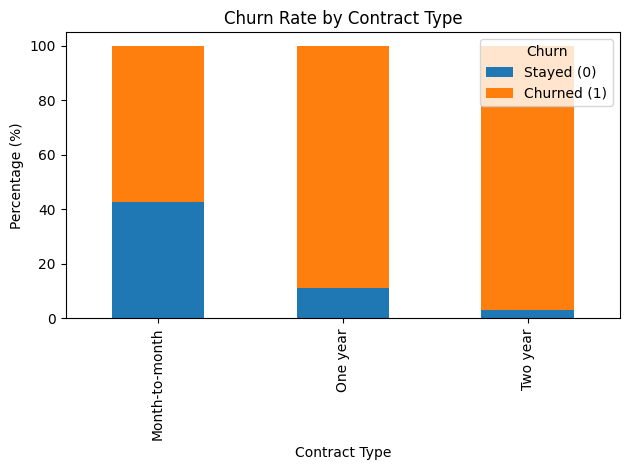

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable 'Churn' (0 = Stayed, 1 = Churned)
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0=Stayed, 1=Churned)')
plt.ylabel('Count')
plt.show()

# Calculate churn rate by 'Contract' type as percentage of each contract category
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart showing percentage churn within each contract type
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage (%)')
plt.xlabel('Contract Type')
plt.legend(title='Churn', labels=['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# 1. Balance the dataset using SMOTE (Synthetic Minority Oversampling Technique)
# This generates synthetic samples for the minority class to address class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# 2. Split the balanced dataset into training and testing sets
# - 80% training data, 20% testing data
# - random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

# 3. Initialize the Random Forest classifier with tuned hyperparameters
model = RandomForestClassifier(
    n_estimators=200,         # Number of trees in the forest
    max_depth=20,             # Maximum depth of each tree to control overfitting
    max_features='sqrt',      # Number of features to consider when looking for best split
    min_samples_split=2,      # Minimum samples required to split a node
    min_samples_leaf=1,       # Minimum samples required at a leaf node
    class_weight='balanced',  # Adjust weights to handle any remaining imbalance
    random_state=42           # Fixed seed for reproducibility
)

# 4. Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=42)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the target variable (Churn) for the test dataset using the trained model
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model on test data
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print a detailed classification report including precision, recall, f1-score, and support for each class
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix showing true positives, false positives, true negatives, and false negatives
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8489835430784124
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1029
           1       0.85      0.84      0.85      1037

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Confusion Matrix:
 [[880 149]
 [163 874]]


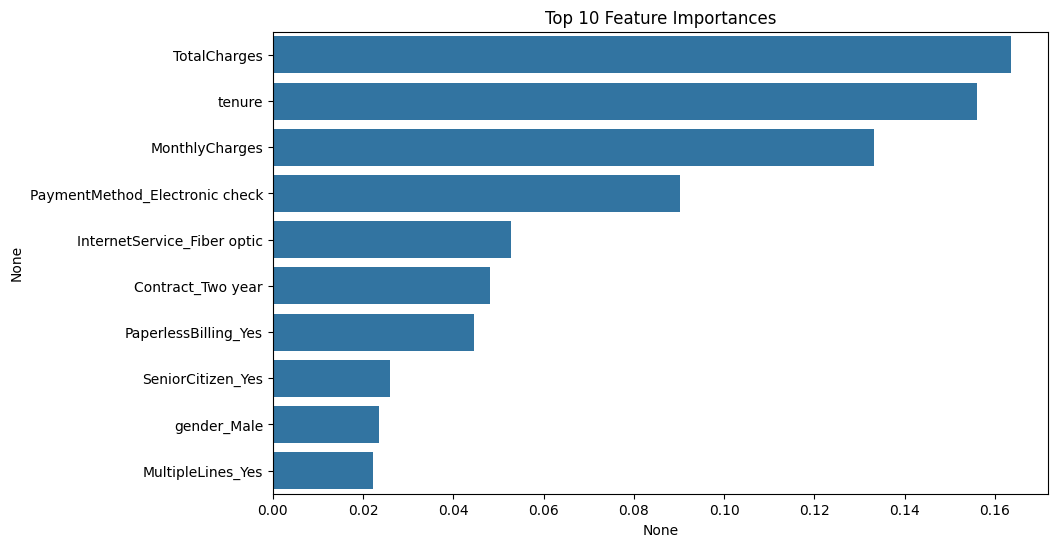

In [46]:
# Extract feature importance scores from the trained Random Forest model
importances = model.feature_importances_

# Get feature names from the feature DataFrame
features = X.columns

# Create a Series with feature names as index and their importance scores as values
# Sort descending and select top 10 features
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False).head(10)

# Set figure size for the plot
plt.figure(figsize=(10, 6))

# Plot a horizontal barplot of the top 10 important features using seaborn
sns.barplot(x=feat_importance, y=feat_importance.index)

# Add a title to the plot
plt.title('Top 10 Feature Importances')

# Show the plot
plt.show()


In [47]:
print("""
Conclusion:
- Customers with month-to-month contracts have higher churn risk.
- Higher monthly charges are correlated with churn.
- Suggest offering incentives for longer-term contracts.
""")



Conclusion:
- Customers with month-to-month contracts have higher churn risk.
- Higher monthly charges are correlated with churn.
- Suggest offering incentives for longer-term contracts.

